In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_labels=pd.read_csv('train_labels.csv')

In [3]:
train_labels.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [4]:
train_labels[train_labels.duplicated()].count()

customer_ID    0
target         0
dtype: int64

In [5]:
labels_count=train_labels.groupby(['target'],as_index=False)[['customer_ID']].count()

labels_count['percentage_of_column']=(labels_count['customer_ID']/labels_count['customer_ID'].sum())*100

In [6]:
labels_count

,target,customer_ID,percentage_of_column
0,0,340085,74.106639
1,1,118828,25.893361


In [9]:
len(train_labels)

458913

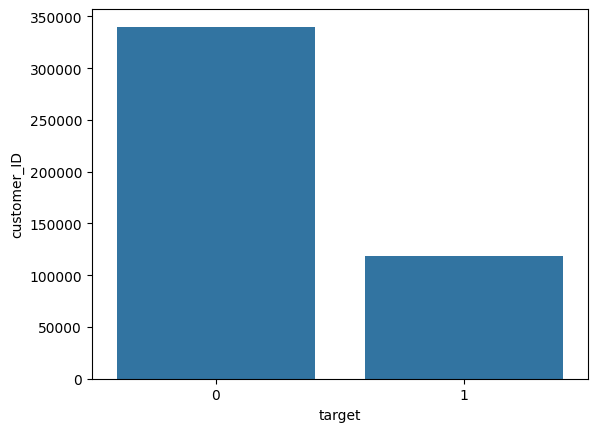

In [10]:
sns.barplot(x=labels_count.target,y=labels_count.customer_ID)
plt.show()

### load train data

In [84]:
chunksize = 10 ** 5

data = pd.DataFrame()
for chunk in pd.read_csv("train_data.csv", chunksize=chunksize):
    data = pd.concat([data, chunk])

In [85]:
#main_data=pd.read_csv('train_data.csv')

In [86]:
data.columns

Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143',
       'D_144', 'D_145'],
      dtype='object', length=190)

In [87]:
#D_* = Delinquency variables - minor crime
#S_* = Spend variables
#P_* = Payment variables
#B_* = Balance variables
#R_* = Risk variables

In [88]:
data.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [89]:
len(data)

5531451

In [90]:
#data start and end statement date and no NaNs
[data.S_2.min(),data.S_2.max(),data.S_2.isna().any()]

['2017-03-01', '2018-03-31', False]

In [91]:
#categorical variables
data[['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']].head()

,B_30,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_66,D_68
0,0.0,2.0,1.0,0.0,4.0,0.0,1.0,CR,O,NaN,6.0
1,0.0,2.0,1.0,0.0,4.0,0.0,1.0,CR,O,NaN,6.0
2,0.0,2.0,1.0,0.0,4.0,0.0,1.0,CR,O,NaN,6.0
3,0.0,2.0,1.0,0.0,4.0,0.0,1.0,CR,O,NaN,6.0
4,0.0,2.0,1.0,0.0,4.0,0.0,1.0,CR,O,NaN,6.0


### considering only 20% of data

In [92]:
labels = train_labels.sample(frac = 0.20, random_state = 52)

In [93]:
labels.head()

,customer_ID,target
58913,2101c0b598114a76b3dda6a3cb09c384fa0833f329062d...,1
357793,c75abb7c22b84bba43b824c5d6843e392b8a8f59c8c611...,0
263430,92a5f27b0ac360fe63c15e560e0dbf701f04ea1a3f3f00...,1
3903,0230065d145d2ccfd311935f10e75ed7c5662424044603...,0
280568,9c40a7ca5dbdd48d96d9e47e6161b8afb3976f16b7ab27...,0


### Merging labes data and customer data

In [94]:
merged_data=pd.merge(labels,data, how= 'inner', on='customer_ID')

In [95]:
merged_data.info(max_cols=200, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105624 entries, 0 to 1105623
Data columns (total 191 columns):
 #    Column       Non-Null Count    Dtype  
---   ------       --------------    -----  
 0    customer_ID  1105624 non-null  object 
 1    target       1105624 non-null  int64  
 2    S_2          1105624 non-null  object 
 3    P_2          1096419 non-null  float64
 4    D_39         1105624 non-null  float64
 5    B_1          1105624 non-null  float64
 6    B_2          1105197 non-null  float64
 7    R_1          1105624 non-null  float64
 8    S_3          904750 non-null   float64
 9    D_41         1105197 non-null  float64
 10   B_3          1105197 non-null  float64
 11   D_42         157890 non-null   float64
 12   D_43         772680 non-null   float64
 13   D_44         1049936 non-null  float64
 14   B_4          1105624 non-null  float64
 15   D_45         1105197 non-null  float64
 16   B_5          1105624 non-null  float64
 17   R_2          1105624 non-

In [96]:
#there are many missing values in both columns and rows so dropping the columns or rows doesn't make sense

In [97]:
#no duplicate rows
merged_data[merged_data.duplicated()]

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145


In [98]:
merged_data.shape

(1105624, 191)

In [99]:
merged_data.customer_ID.value_counts().value_counts()

count
13    77169
12     2111
10     1383
9      1279
8      1230
2      1221
3      1148
11     1142
6      1114
1      1054
7      1011
5       967
4       954
Name: count, dtype: int64

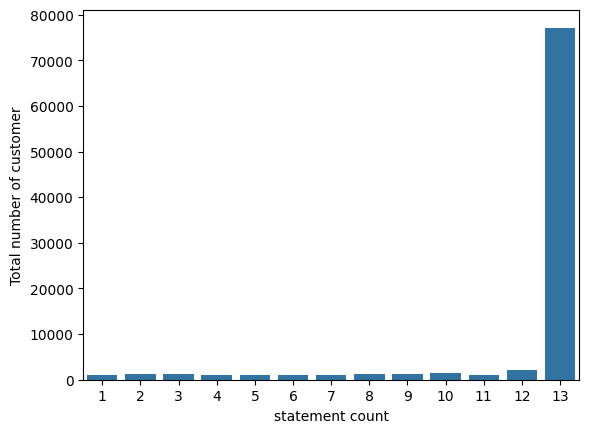

In [100]:
#number of customers and their statement count
sns.barplot(merged_data.customer_ID.value_counts().value_counts().sort_index(ascending=False).rename('Total number of customer'))
plt.xlabel('statement count')
plt.show()

In [101]:
#which means most of the customers are present for 13 months

### calculating the default rate per month

In [102]:
from copy import deepcopy

In [103]:
#check the default rate on each month
temp1_dt=deepcopy(merged_data)
temp1_dt['temp_yearmonth']=temp1_dt.S_2.str.slice(0,7)


In [104]:
one=temp1_dt[temp1_dt.target==1].groupby(['temp_yearmonth'],as_index=False)[['customer_ID']].count()
one=one.rename(columns={'customer_ID':'default_observation'})

In [105]:
two=temp1_dt.groupby(['temp_yearmonth'],as_index=False)[['customer_ID']].count()
two=two.rename(columns={'customer_ID':'total_observations'})

In [106]:
three=one.merge(two,on=['temp_yearmonth'])

In [107]:
three['default_rate_per_month']=round(three.default_observation/three.total_observations,4)

In [108]:
three

,temp_yearmonth,default_observation,total_observations,default_rate_per_month
0,2017-03,18406,79044,0.2329
1,2017-04,19002,80201,0.2369
2,2017-05,19147,79971,0.2394
3,2017-06,19917,82001,0.2429
4,2017-07,20420,83052,0.2459
5,2017-08,20932,84160,0.2487
6,2017-09,21326,85017,0.2508
7,2017-10,21742,86005,0.2528
8,2017-11,22124,86836,0.2548
9,2017-12,22540,87798,0.2567


In [109]:
np.mean(merged_data['target'])
#overall we have 24% of observations have default rate

0.24937863143347105

In [110]:
###categrorical features

In [1]:
merged_data.B_30.unique()

NameError: name 'merged_data' is not defined

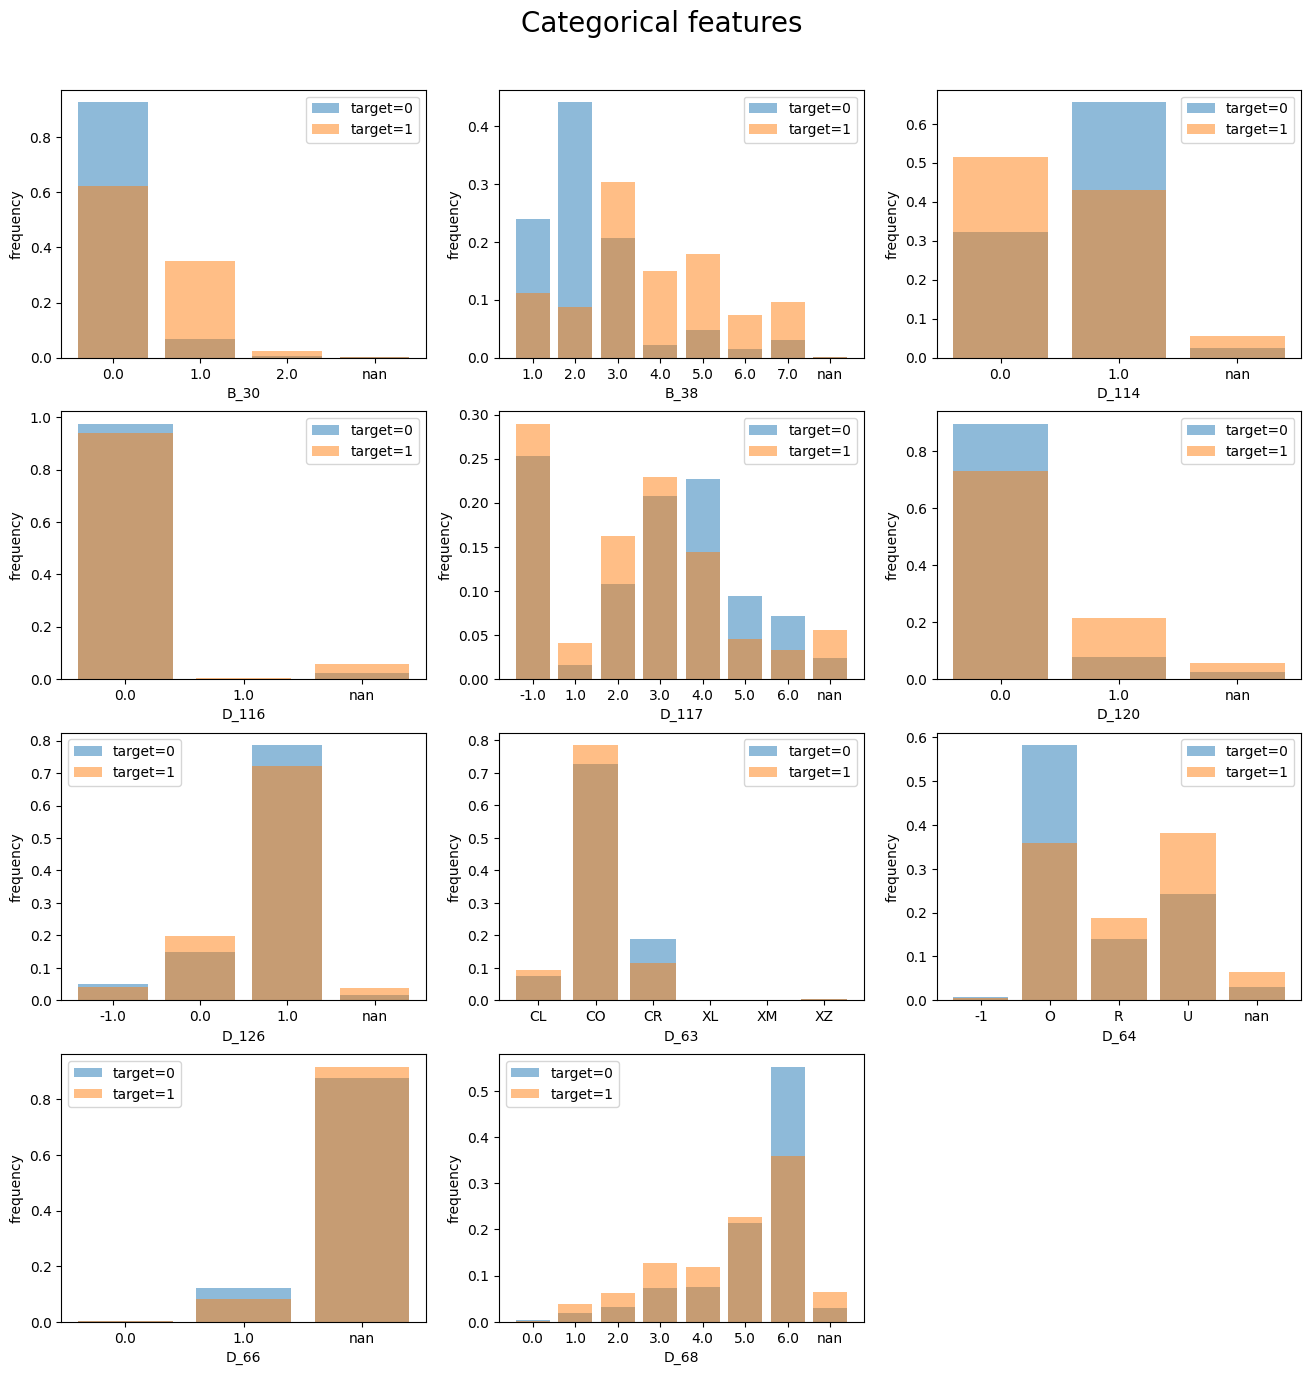

In [112]:
cat_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
plt.figure(figsize=(16, 16))
for i, f in enumerate(cat_features):
    plt.subplot(4, 3, i+1)
    temp = pd.DataFrame(merged_data[f][merged_data.target == 0].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=0')
    temp = pd.DataFrame(merged_data[f][merged_data.target == 1].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=1')
    plt.xlabel(f)
    plt.ylabel('frequency')
    plt.legend()
    plt.xticks(temp.index, temp.value)
plt.suptitle('Categorical features', fontsize=20, y=0.93)
plt.show()
del temp

In [113]:
#Every feature has at most eight categories (including a nan category). One-hot encodings are feasible.

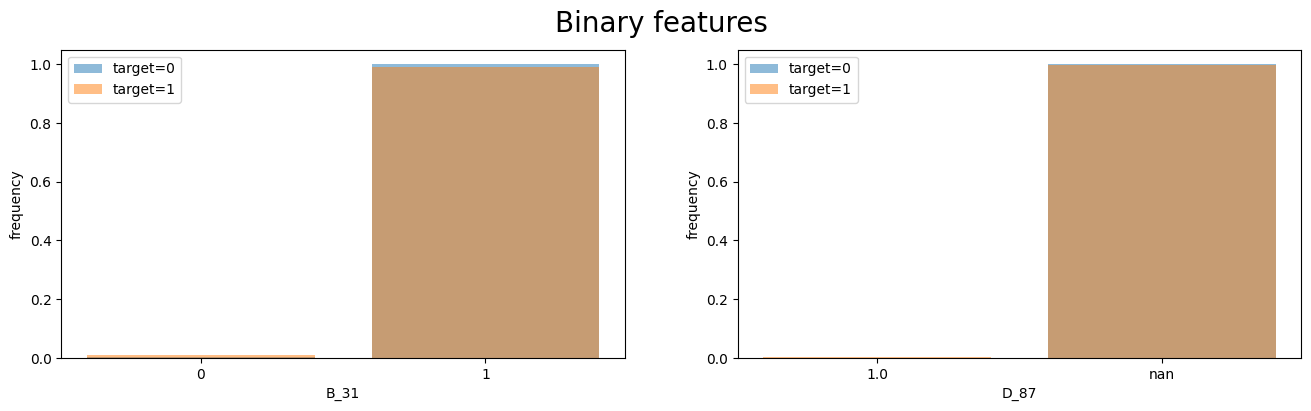

In [114]:
bin_features = ['B_31', 'D_87']
plt.figure(figsize=(16, 4))
for i, f in enumerate(bin_features):
    plt.subplot(1, 2, i+1)
    temp = pd.DataFrame(merged_data[f][merged_data.target == 0].value_counts(dropna=False,normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=0')
    temp = pd.DataFrame(merged_data[f][merged_data.target == 1].value_counts(dropna=False,normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=1')
    plt.xlabel(f)
    plt.ylabel('frequency')
    plt.legend()
    plt.xticks(temp.index, temp.value)
plt.suptitle('Binary features', fontsize=20)
plt.show()
del temp

185


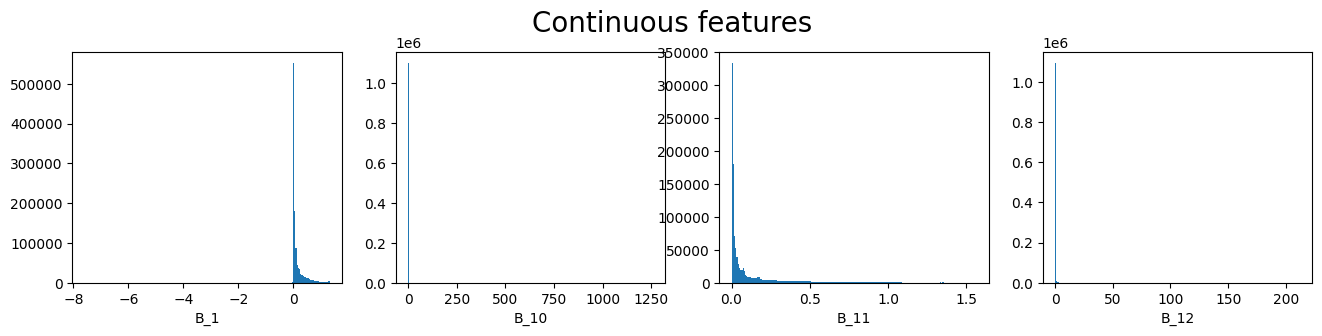

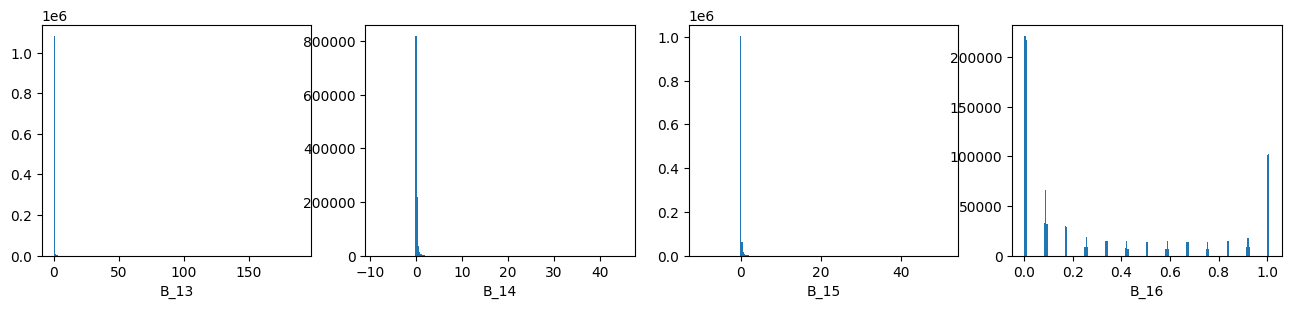

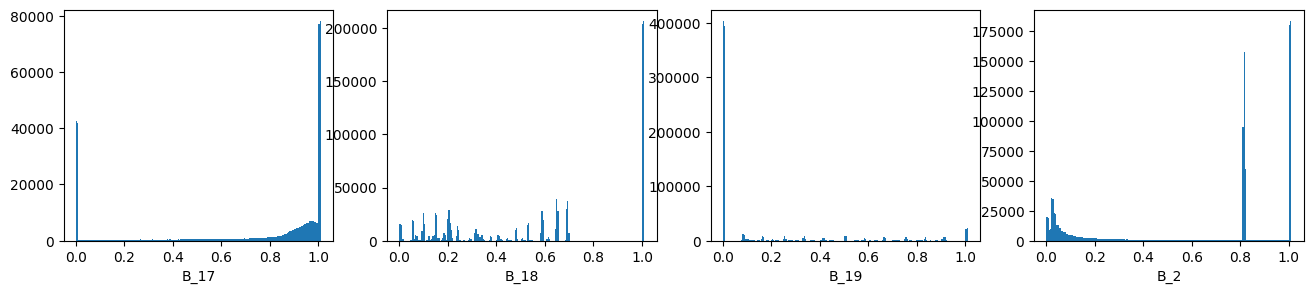

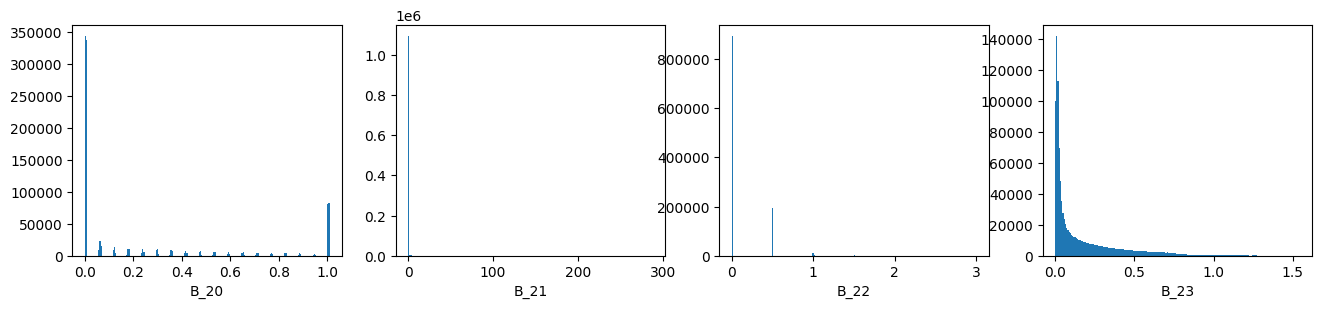

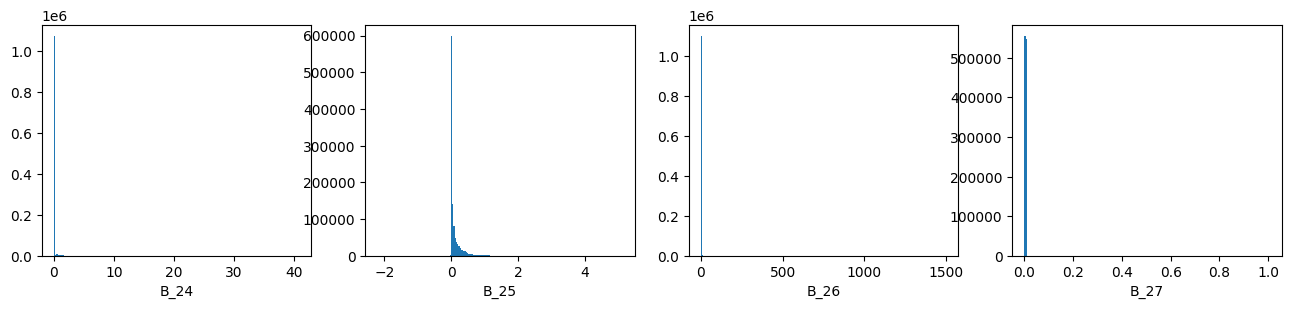

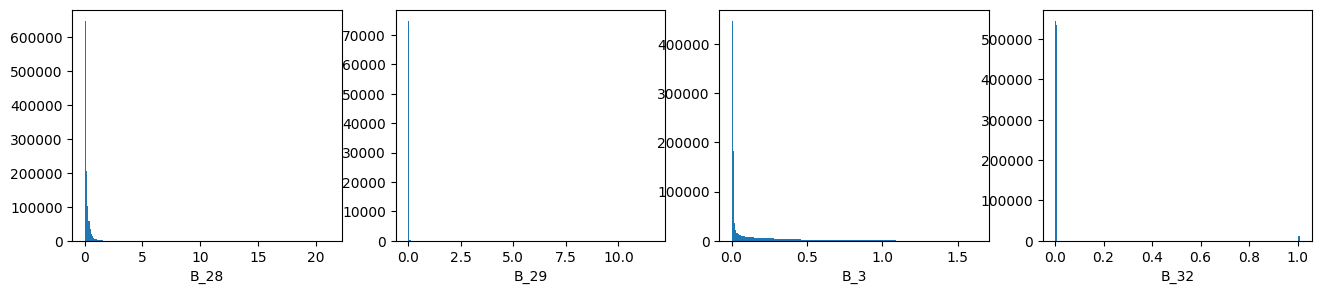

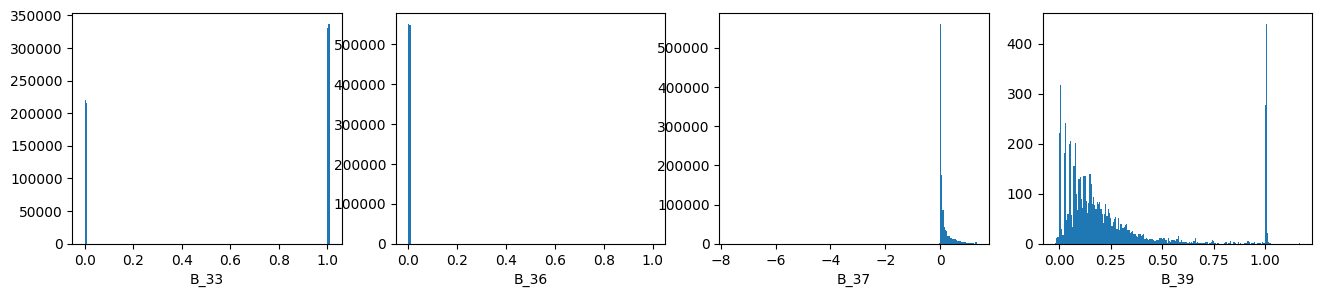

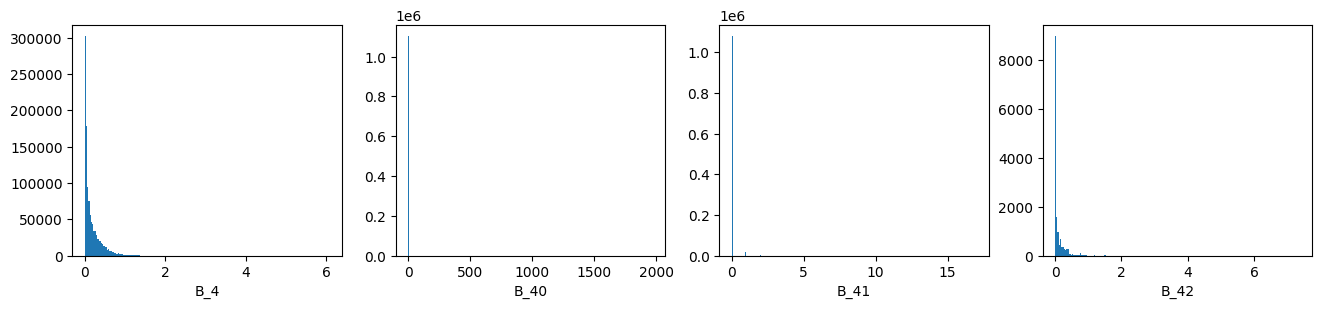

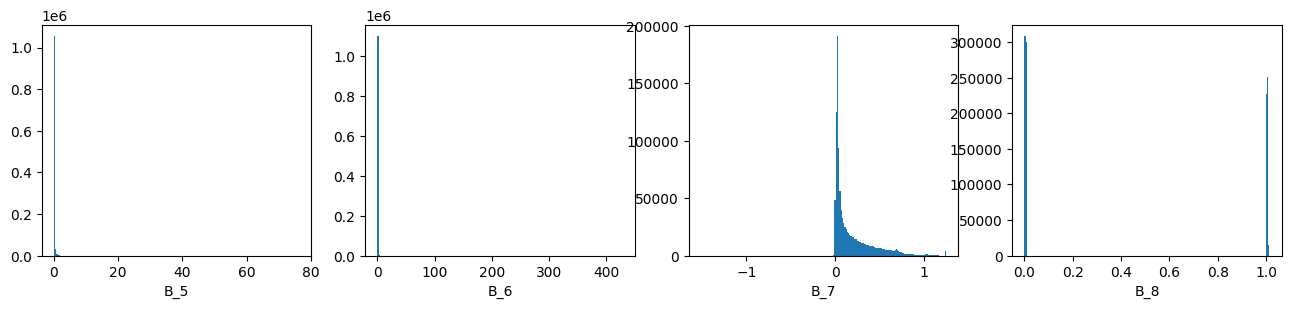

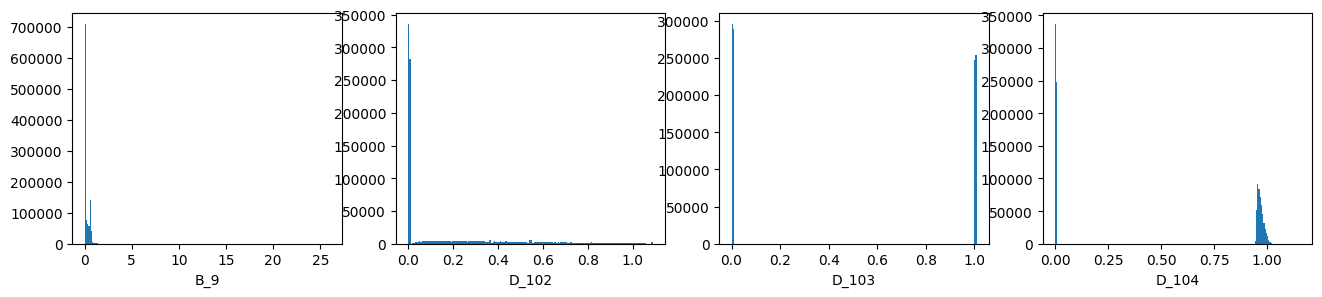

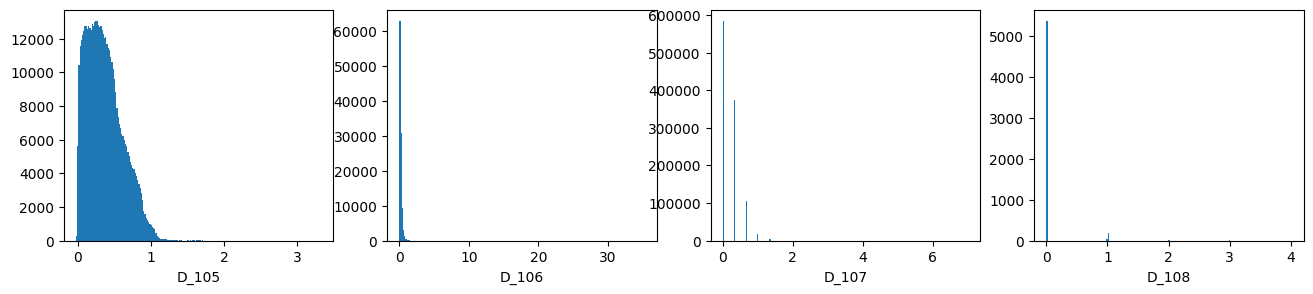

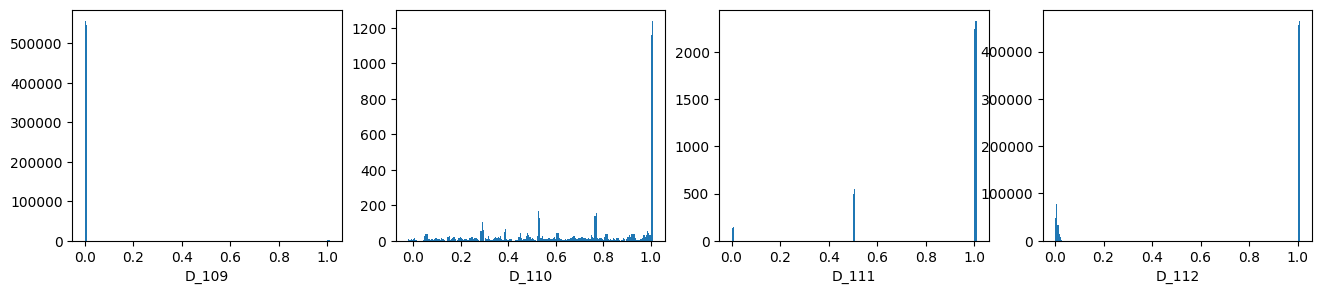

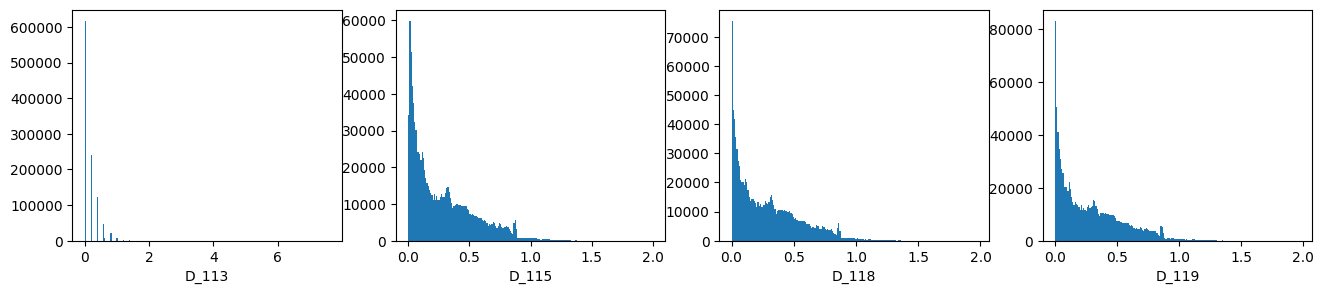

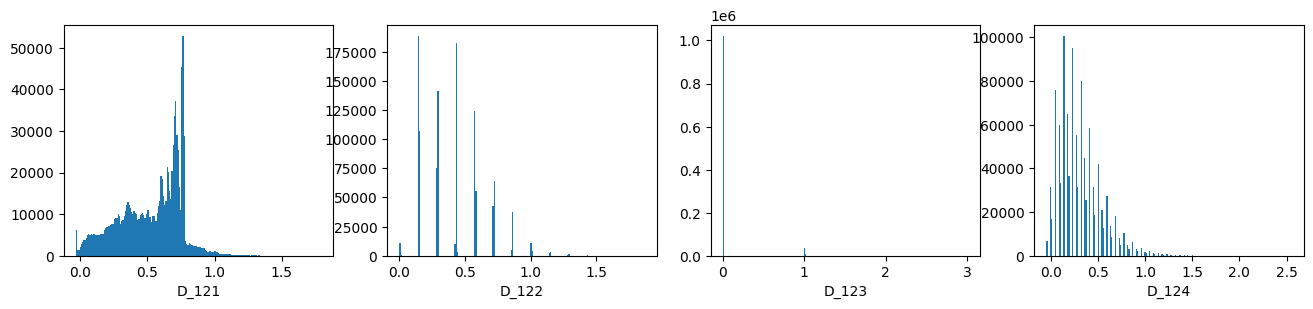

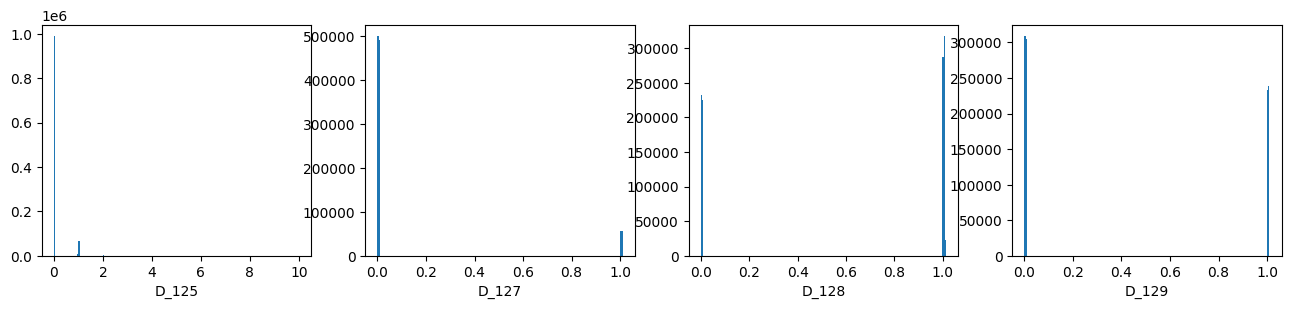

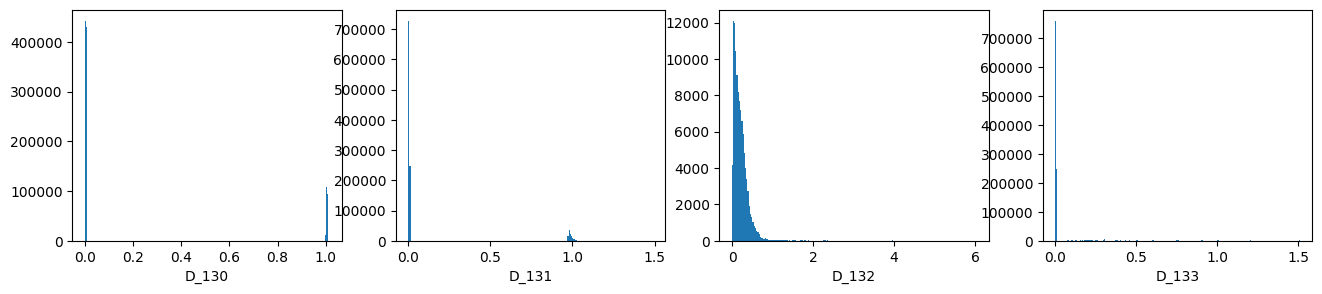

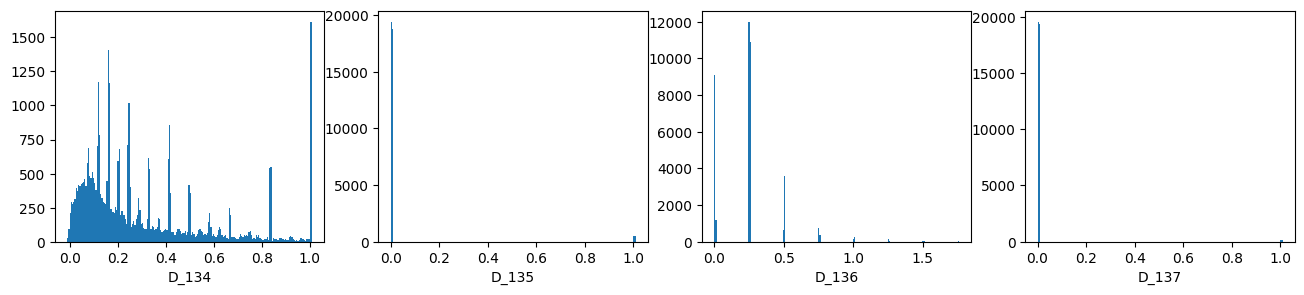

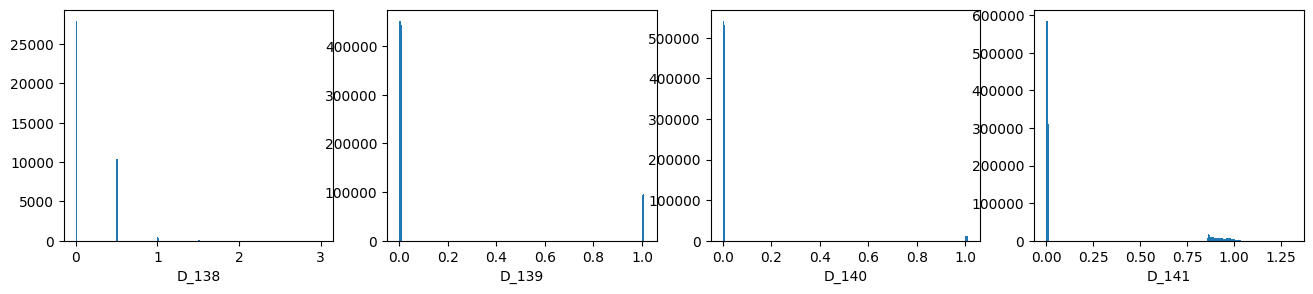

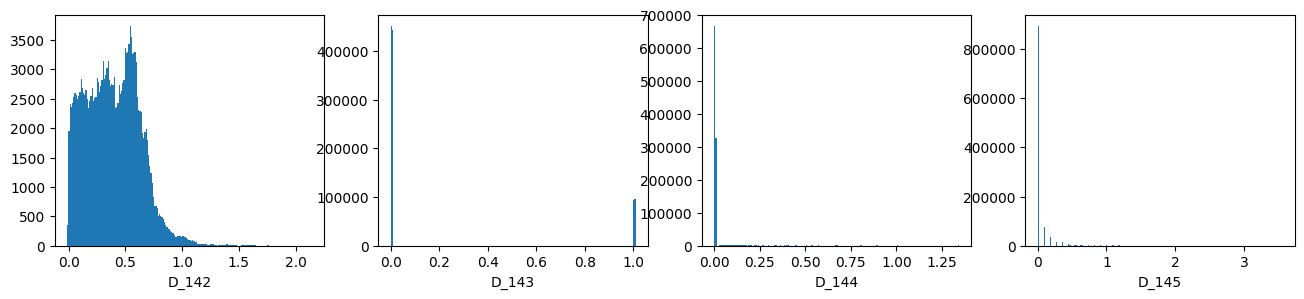

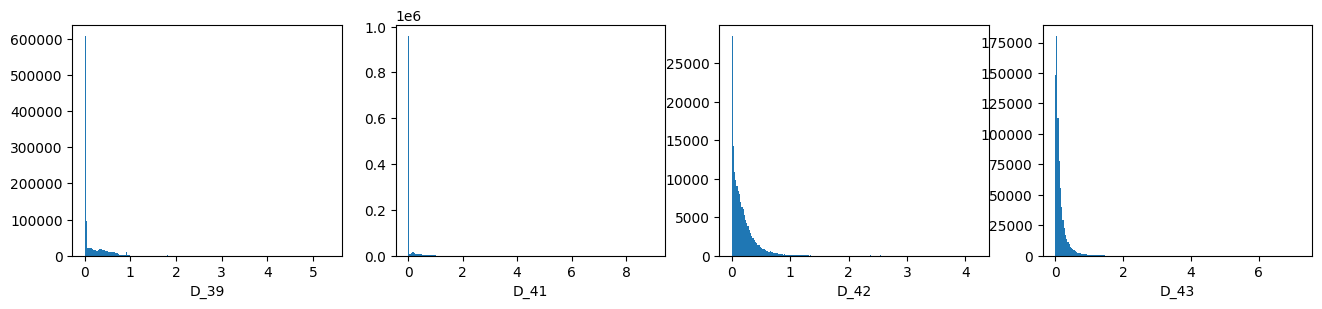

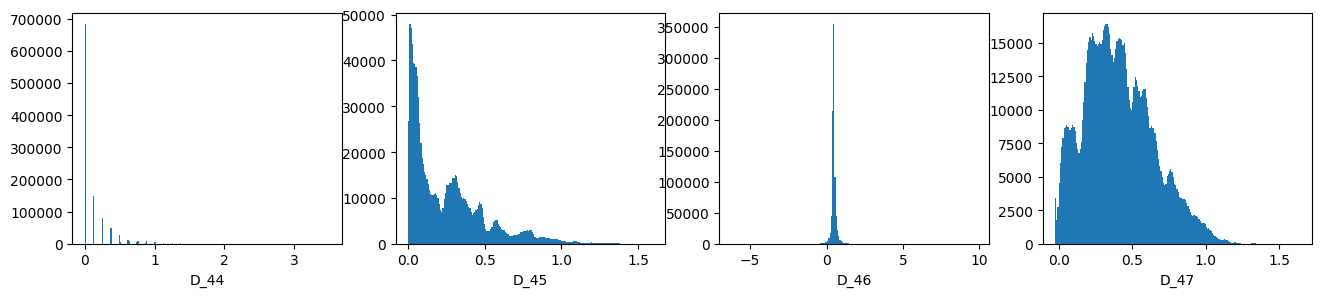

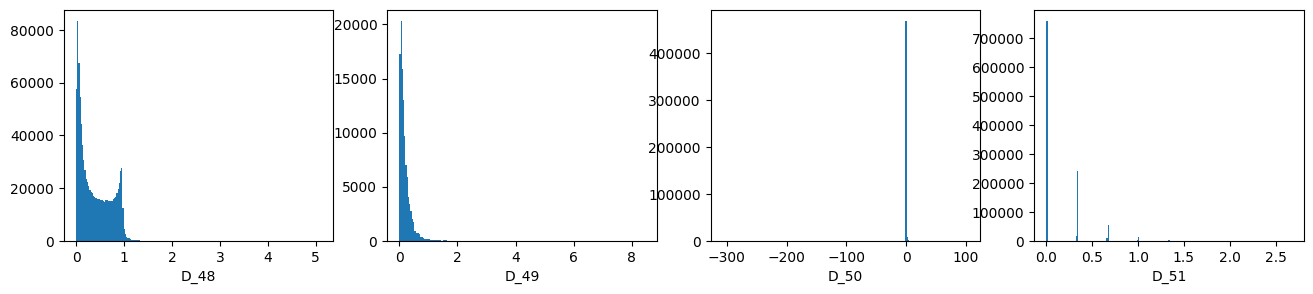

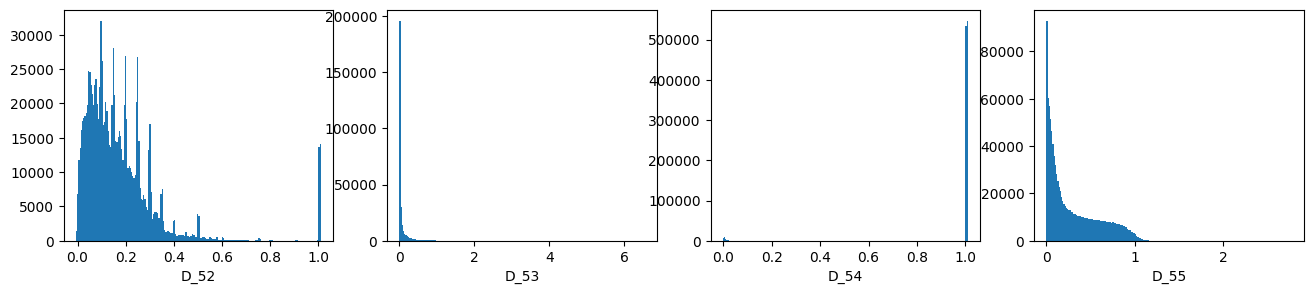

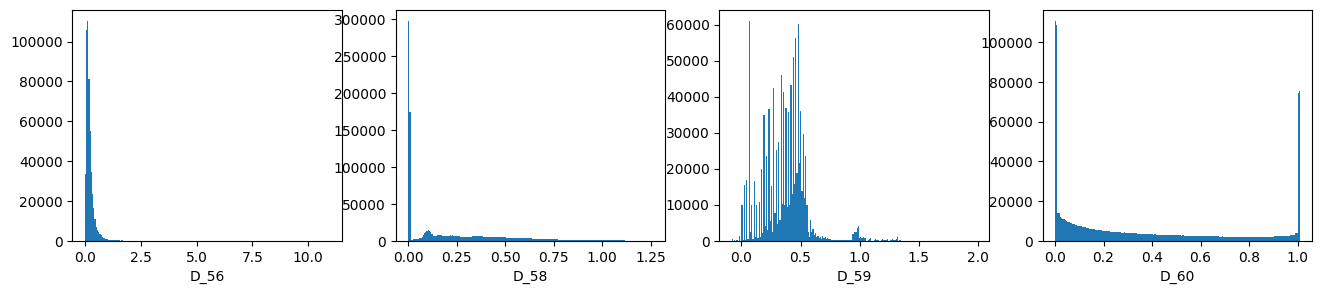

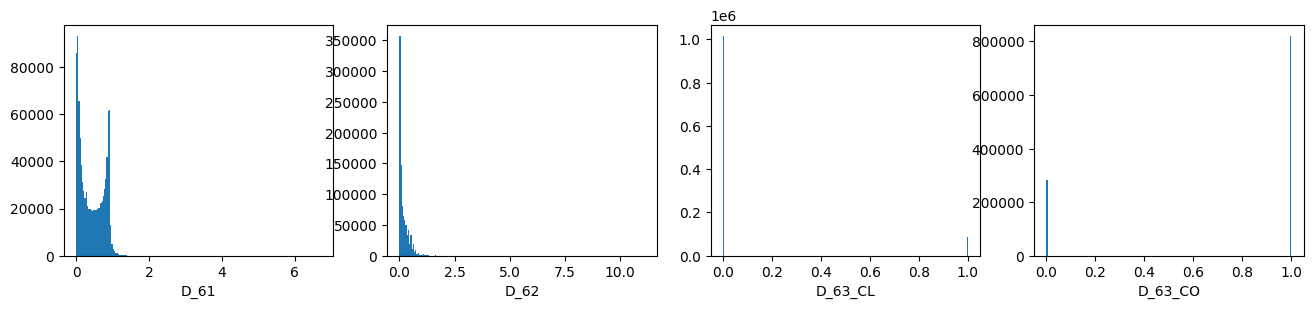

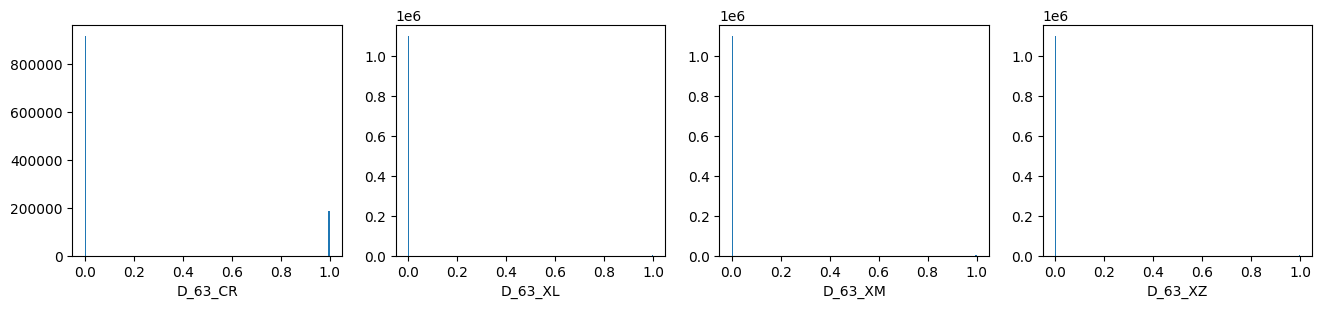

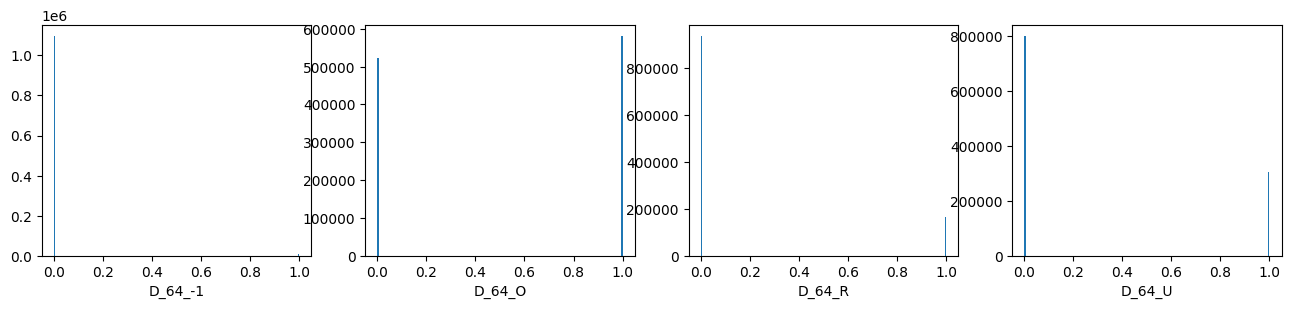

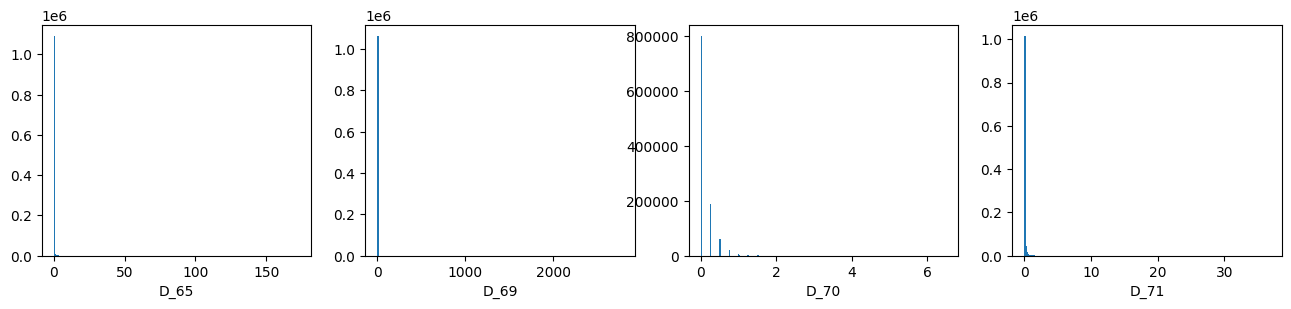

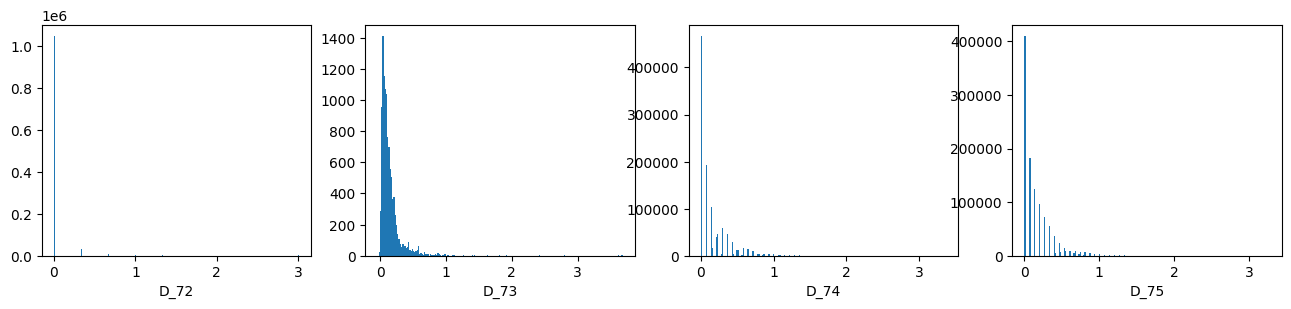

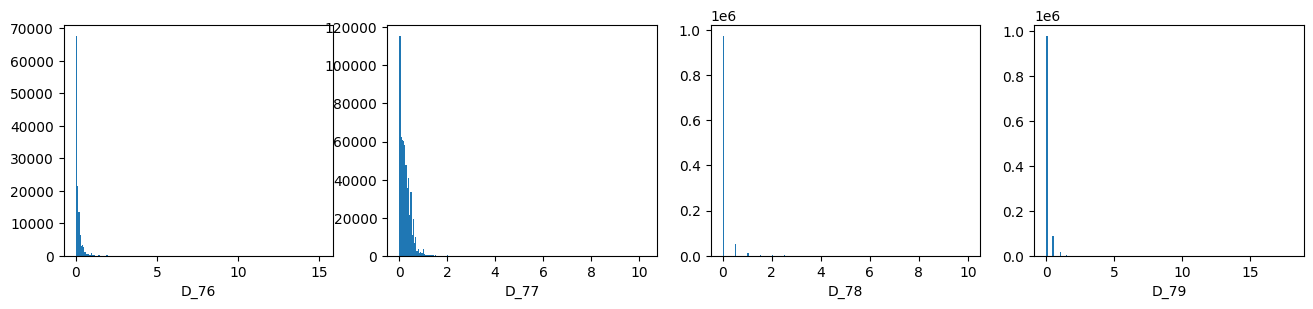

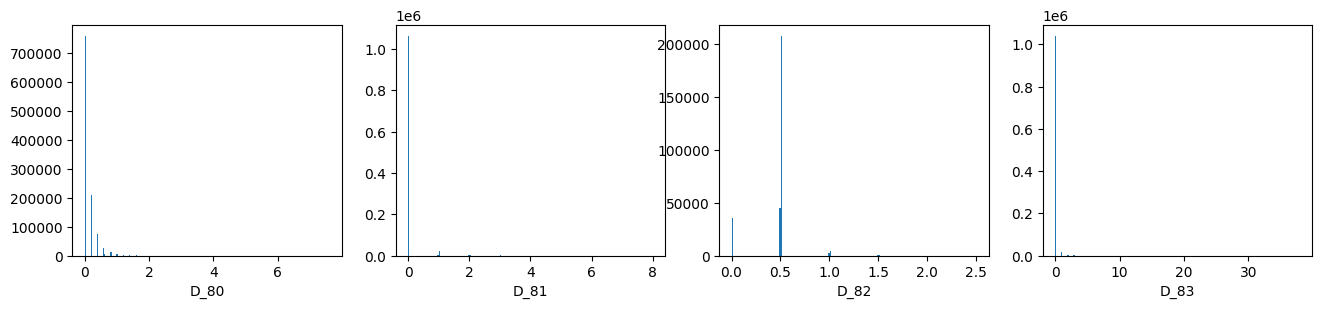

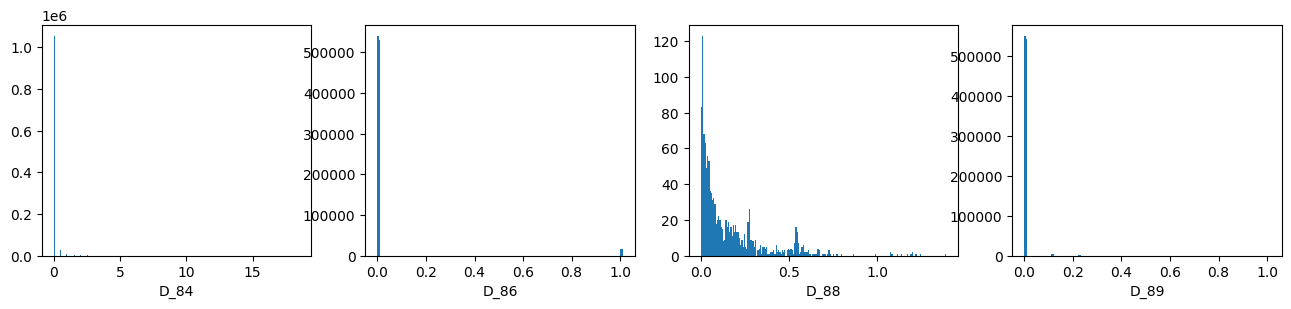

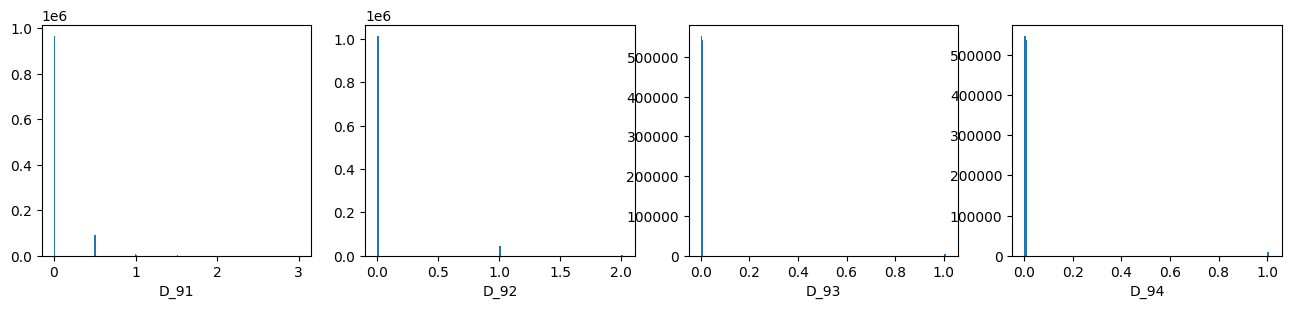

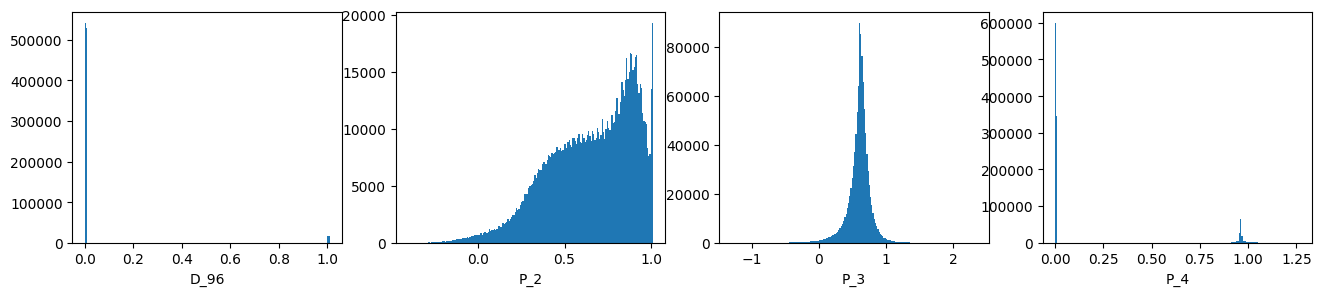

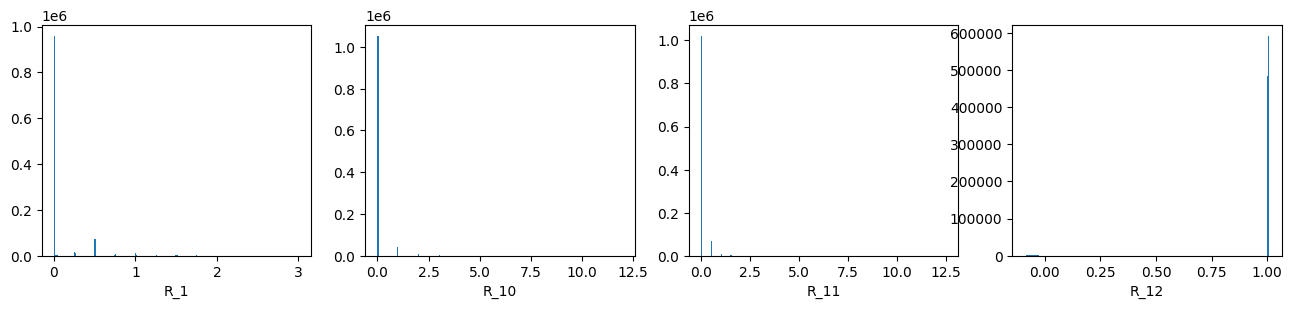

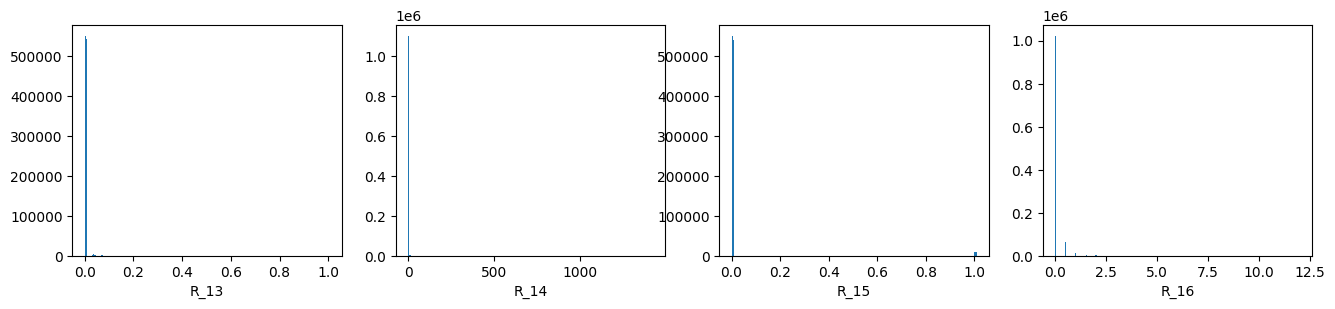

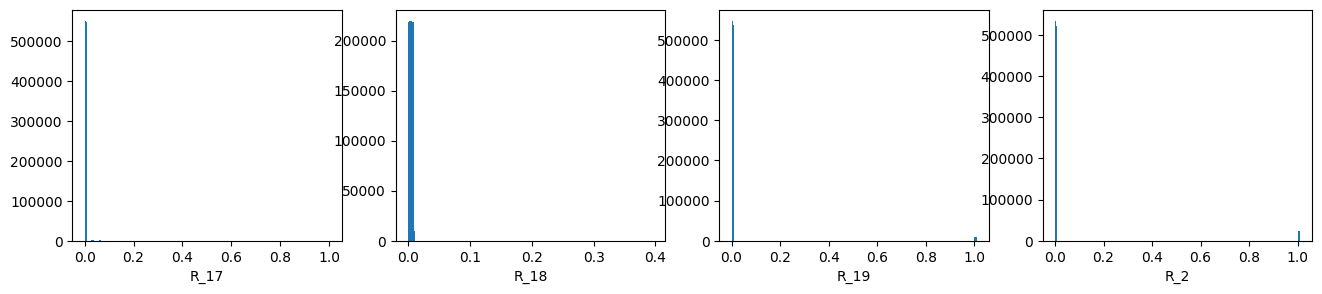

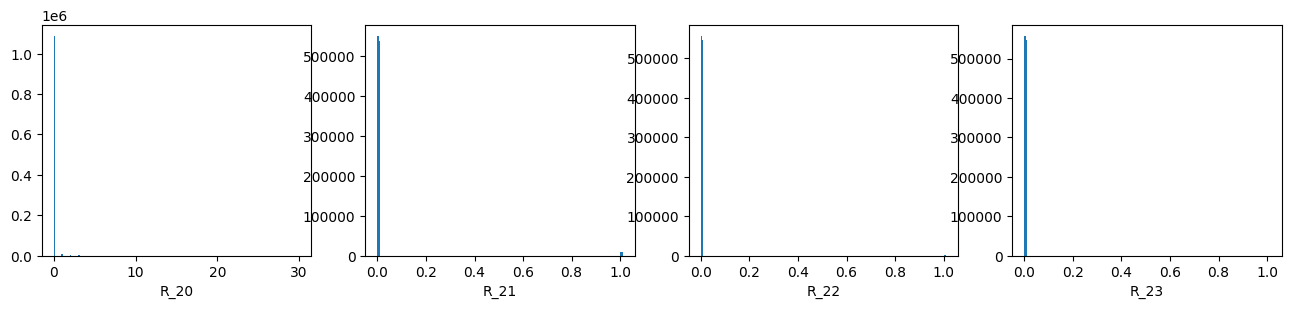

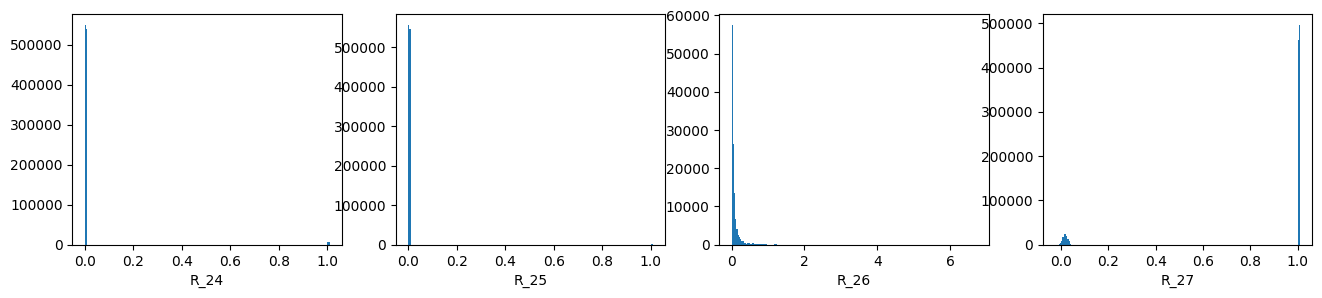

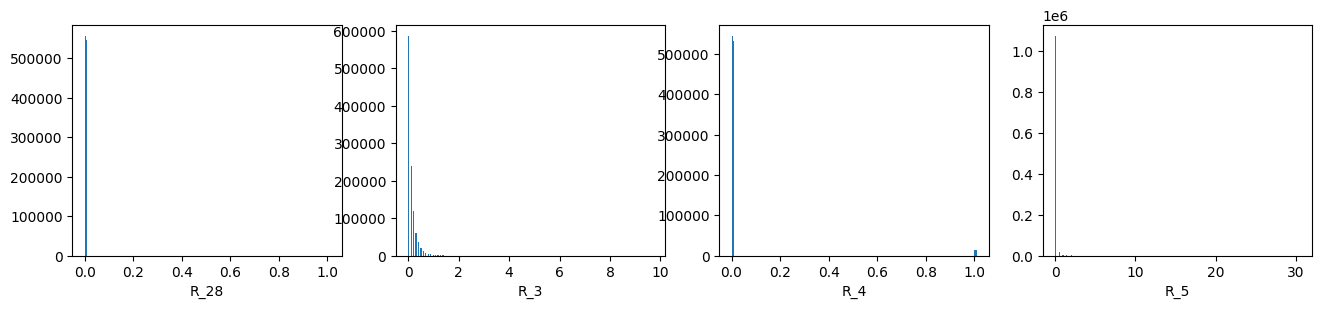

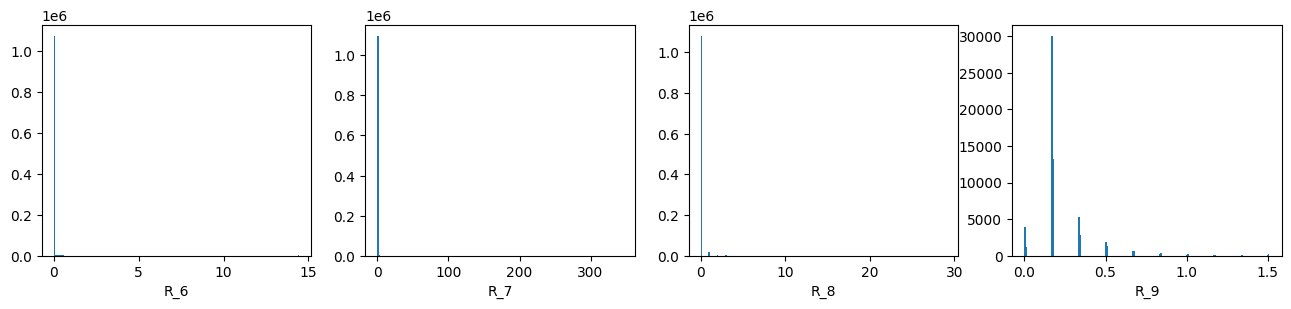

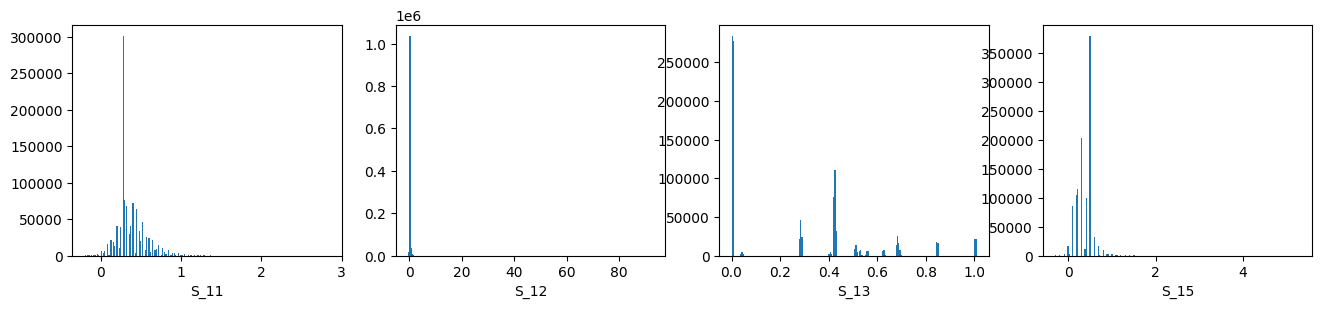

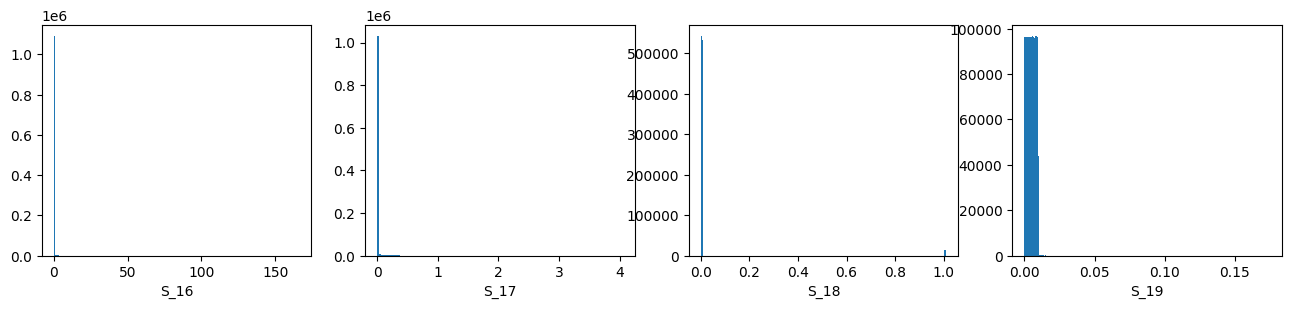

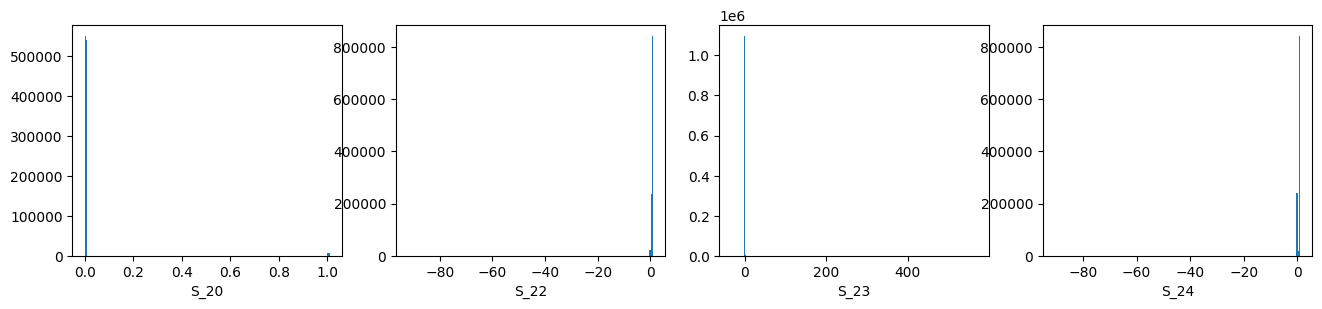

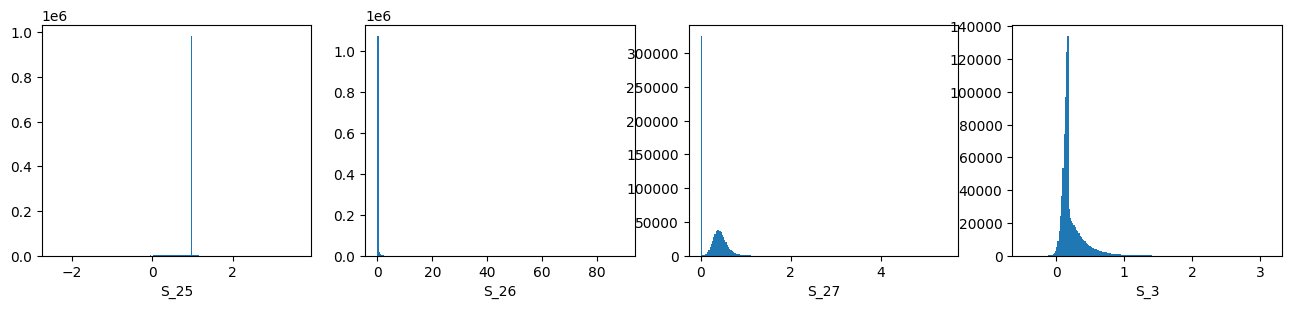

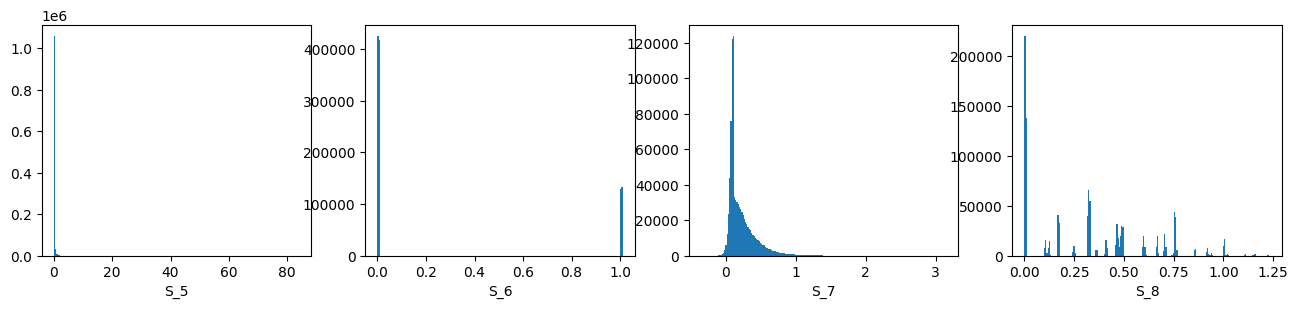

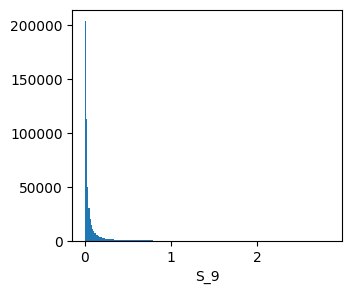

In [127]:
cont_features = sorted([f for f in merged_data.columns if f not in cat_features + bin_features + ['customer_ID', 'target', 'S_2']])
print(len(cont_features))
# print(cont_features)
ncols = 4
for i, f in enumerate(cont_features):
    if i % ncols == 0: 
        if i > 0: plt.show()
        plt.figure(figsize=(16, 3))
        if i == 0: plt.suptitle('Continuous features', fontsize=20, y=1.02)
    plt.subplot(1, ncols, i % ncols + 1)
    plt.hist(merged_data[f], bins=200)
    plt.xlabel(f)
plt.show()

In [115]:
#one hot encoding

In [116]:
#columns as per different category

In [117]:
count_D = merged_data.columns[merged_data.columns.str.contains('D')]
count_S = merged_data.columns[merged_data.columns.str.contains('S')]
count_P = merged_data.columns[merged_data.columns.str.contains('P')]
count_B = merged_data.columns[merged_data.columns.str.contains('B')]
count_R = merged_data.columns[merged_data.columns.str.contains('R')]

print("Delinquency :", count_D.shape[0])
print("Spend:", count_S.shape[0])
print("Payment:", count_P.shape[0])
print("Balance:", count_B.shape[0])
print("Risk:", count_R.shape[0])

Delinquency : 97
Spend: 22
Payment: 3
Balance: 40
Risk: 28


In [118]:
#binary varibales
merged_data = pd.get_dummies(merged_data, columns = ['D_63', 'D_64'],dtype='int')

In [120]:
new_df=pd.DataFrame()
for col in['B_30','B_38','D_114','D_116','D_117','D_120','D_126','D_66','D_68']:
    col_dummies=pd.get_dummies(merged_data[col],prefix=col,dtype='int')
    new_df=pd.concat([new_df,col_dummies],axis=1)

In [121]:
merged_data=merged_data.drop(columns={'B_30','B_38','D_114','D_116','D_117','D_120','D_126','D_66','D_68'})


In [122]:
final_merged_dt=pd.concat([merged_data,new_df],axis=1)

In [123]:
print(final_merged_dt.shape)

(1105624, 225)


In [124]:
final_merged_dt.head()

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_126_1.0,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,2101c0b598114a76b3dda6a3cb09c384fa0833f329062d...,1,2017-03-23,0.310200,0.008095,0.517567,0.116688,0.004788,0.170171,0.000903,...,1,0,0,0,0,0,1,0,0,0
1,2101c0b598114a76b3dda6a3cb09c384fa0833f329062d...,1,2017-04-03,0.288228,0.362597,0.305423,0.116505,0.003811,0.148202,0.009072,...,1,0,0,0,0,0,1,0,0,0
2,2101c0b598114a76b3dda6a3cb09c384fa0833f329062d...,1,2017-05-23,0.282362,0.030221,0.483003,0.057409,0.000753,0.148253,0.001561,...,1,0,0,0,0,0,1,0,0,0
3,2101c0b598114a76b3dda6a3cb09c384fa0833f329062d...,1,2017-06-22,0.279579,0.030232,0.425258,0.056684,0.003331,0.154602,0.001127,...,1,0,0,0,0,0,1,0,0,0
4,2101c0b598114a76b3dda6a3cb09c384fa0833f329062d...,1,2017-07-22,0.287119,0.034164,0.341967,0.080234,0.000953,0.157003,0.001779,...,1,0,0,0,0,0,1,0,0,0


In [125]:

final_merged_dt.info(max_cols=230, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105624 entries, 0 to 1105623
Data columns (total 225 columns):
 #    Column       Non-Null Count    Dtype  
---   ------       --------------    -----  
 0    customer_ID  1105624 non-null  object 
 1    target       1105624 non-null  int64  
 2    S_2          1105624 non-null  object 
 3    P_2          1096419 non-null  float64
 4    D_39         1105624 non-null  float64
 5    B_1          1105624 non-null  float64
 6    B_2          1105197 non-null  float64
 7    R_1          1105624 non-null  float64
 8    S_3          904750 non-null   float64
 9    D_41         1105197 non-null  float64
 10   B_3          1105197 non-null  float64
 11   D_42         157890 non-null   float64
 12   D_43         772680 non-null   float64
 13   D_44         1049936 non-null  float64
 14   B_4          1105624 non-null  float64
 15   D_45         1105197 non-null  float64
 16   B_5          1105624 non-null  float64
 17   R_2          1105624 non-

In [128]:
final_merged_dt.to_csv('one_hot_encoded_data.csv')

In [83]:
final_merged_dt[['B_38_2.0']]

,B_38_2.0
0,0
1,0
2,0
3,0
4,0
...,...
1105619,0
1105620,0
1105621,0
1105622,0
